In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from collections import Counter
from collections import defaultdict

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.util import ngrams
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
raw_resume_df = pd.read_csv('resume_data.csv') # will use it for counting stop words
resume_df = pd.read_csv('Clean_resumes.csv')
resume_df.head()

,Resume_Category,Category_num,Resume_Details
0,Intership,0,name ravali curriculum vitae specialization co...
1,Intership,0,susovan bag nseeking challenging position fiel...
2,Peoplesoft,1,anubhav kumar singh ncore competencies nscript...
3,Peoplesoft,1,ananda rayudu ananda rayudu summary years expe...
4,Peoplesoft,1,peoplesoft database administrator ngangareddy ...


## Analyzing text statistics of resumes :

+ word frequency analysis,
+ sentence length analysis,
+ average word length analysis, etc.


1. Look the number of characters present in each resume. This can give us a rough idea about the resume length.

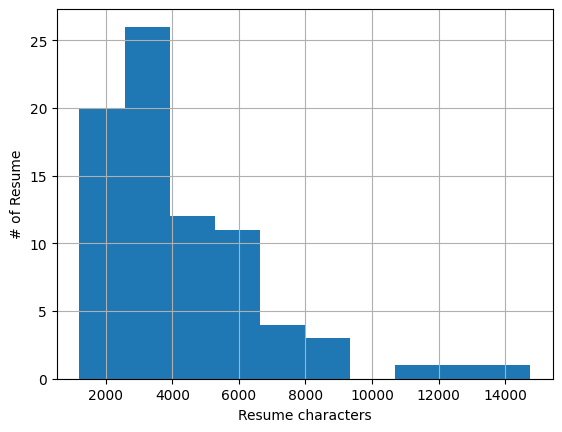

In [ ]:
resume_df.Resume_Details.str.len().hist()
plt.xlabel("Resume characters")
plt.ylabel("# of Resume")
plt.show()

## Histogram Shows that resume has 2000 to 14000 characters and majority of resume has 2000 to 6000 characters

## Now, we will move on to data exploration at a word-level. Let’s plot the number of words appearing in resumes.

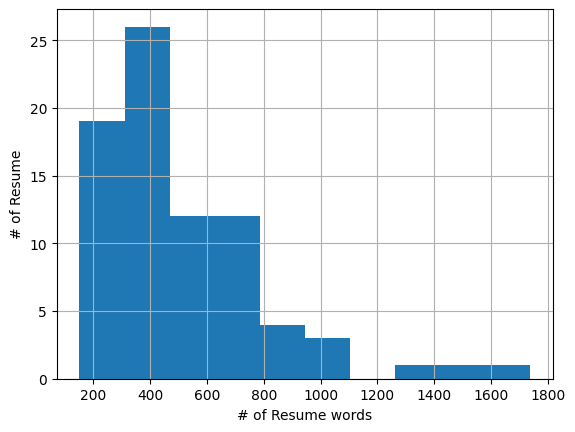

In [ ]:
resume_df.Resume_Details.str.split().map(lambda x:len(x)).hist()
plt.xlabel("# of Resume words")
plt.ylabel("# of Resume")
plt.show()

## It is clear that in general the resumes have 200 to 800 words however resume word length varies from 200 to 1700 words


### Upnext :- let’s check the average word length in each resume.

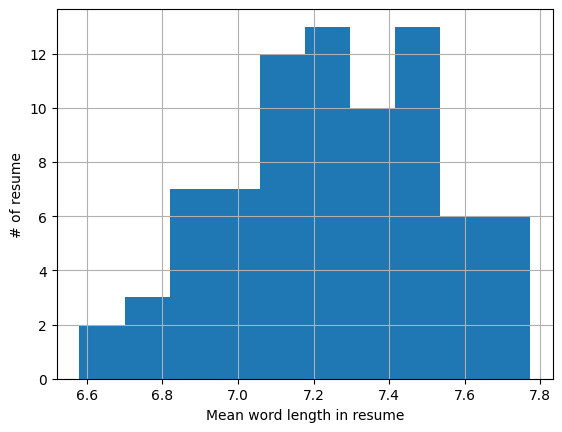

In [ ]:
resume_df['Resume_Details'].str.split().apply(lambda x:[len(i)for i in x]).map(lambda x:np.mean(x)).hist()
plt.xlabel("Mean word length in resume")
plt.ylabel("# of resume")
plt.show()

## Mean word length in all the resumes varies from 6.6 to 7.8


## Check for remaining stop words in cleaned resume if any

In [ ]:
stop=set(stopwords.words('english'))

### Creatng the corpus for raw_resume and plotting the stopwords in it

In [ ]:
raw_resume_df.columns

Index(['Resume_Category', 'Raw Details', 'Category_num'], dtype='object')

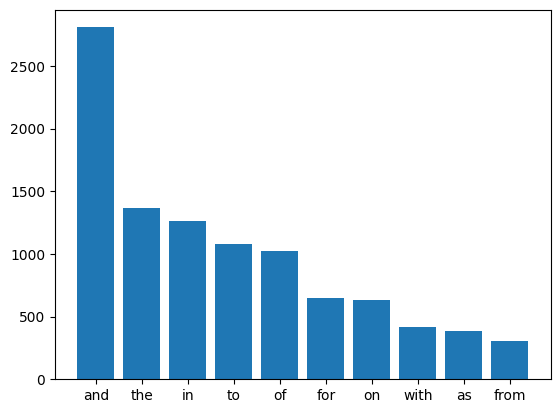

In [ ]:
raw_corpus=[]
resume= raw_resume_df['Raw Details'].str.split()
resume=resume.values.tolist()
corpus=[word for i in resume for word in i]

raw_dic=defaultdict(int)
for word in corpus:
    if word in stop:
        raw_dic[word]+=1
top=sorted(raw_dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y)
plt.show()

## The top 10 most occuring word in the raw format of resume are all stopwords


## Word Frequency Plot of cleaned format of resume for each resume category

In [ ]:
def word_frequency(df,category):
  count = df[df['Resume_Category'] == category]['Resume_Details'].str.split(expand=True).stack().value_counts().reset_index()
  count.columns = ['Word', 'Frequency']
  return count.head(10)

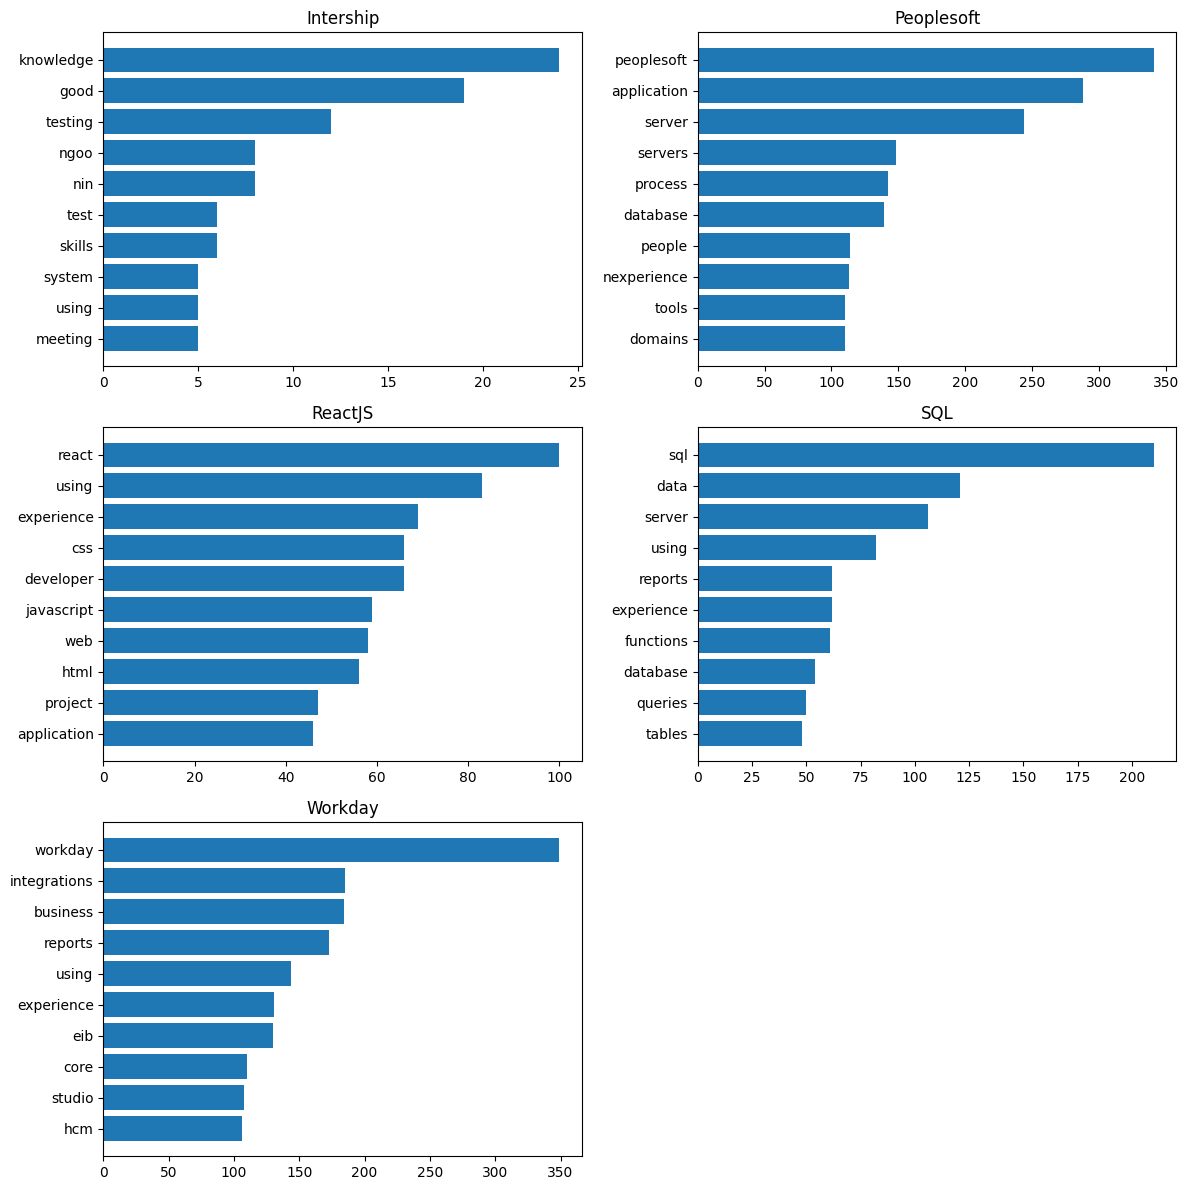

In [ ]:
plt.figure(figsize=(12, 12))
categories = resume_df['Resume_Category'].unique()

for i, category in enumerate(categories):
    plt.subplot(3, 2, i+1)
    plt.title(f'{category}')
    wc = word_frequency(resume_df, category).sort_values('Frequency',ascending = True)
    plt.barh(data=wc,y = 'Word',width= 'Frequency')

plt.tight_layout()
plt.show()
plt.close()

## N-gram exploration for each category of resumes

## N-gram is simply contigus sequence of n-words looking at the n-grams of each category of resume can give us a better understanding of the context in which the word was used for a paricular resume category.

In [ ]:
set(resume_df.Resume_Category.values)

{'Intership', 'Peoplesoft', 'ReactJS', 'SQL', 'Workday'}

## Top 10 ngrams for resumes

In [ ]:
def plot_top_ngrams_barchart(text, n=2):

    txt= text.str.split()
    txt=txt.values.tolist()
    corpus=[word for i in txt for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

## Top 10 bigrams for Peoplesoft resumes

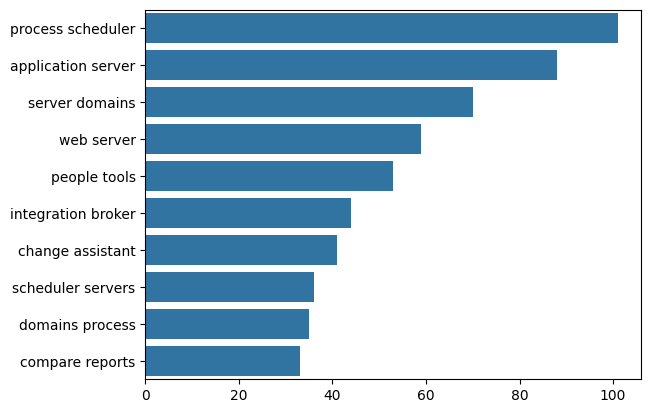

In [ ]:
plot_top_ngrams_barchart(resume_df[resume_df['Resume_Category']=='Peoplesoft']['Resume_Details'])

## Top 10 Trigrams for Peoplesoft resumes

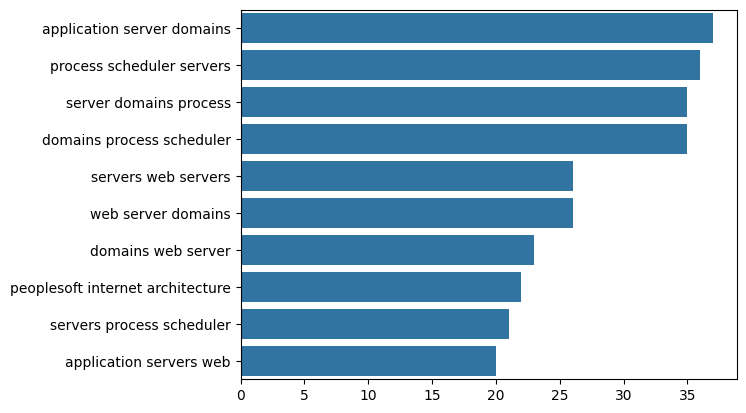

In [ ]:
plot_top_ngrams_barchart(resume_df[resume_df['Resume_Category']=='Peoplesoft']['Resume_Details'],3)

## Top 10 bigram for ReactJS resumes

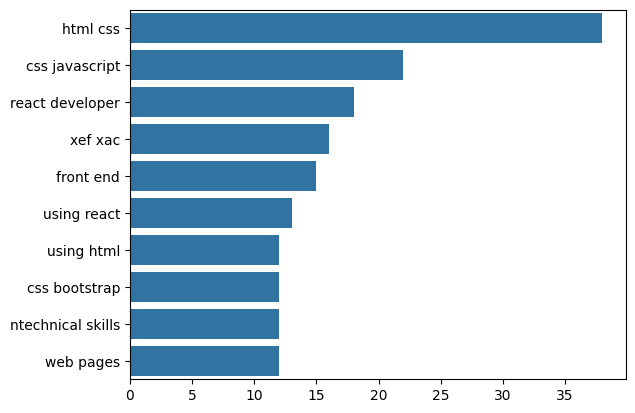

In [ ]:
plot_top_ngrams_barchart(resume_df[resume_df['Resume_Category']=='ReactJS']['Resume_Details'])

## Top 10 Trigram of ReactJS resumes

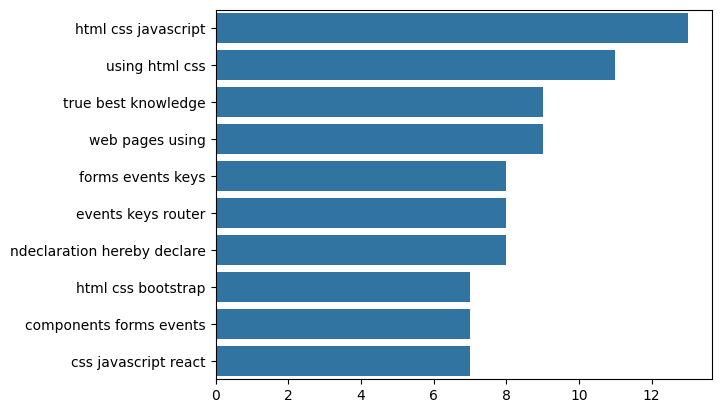

In [ ]:
plot_top_ngrams_barchart(resume_df[resume_df['Resume_Category']=='ReactJS']['Resume_Details'],3)

## Top 10 Bigram for SQL resumes

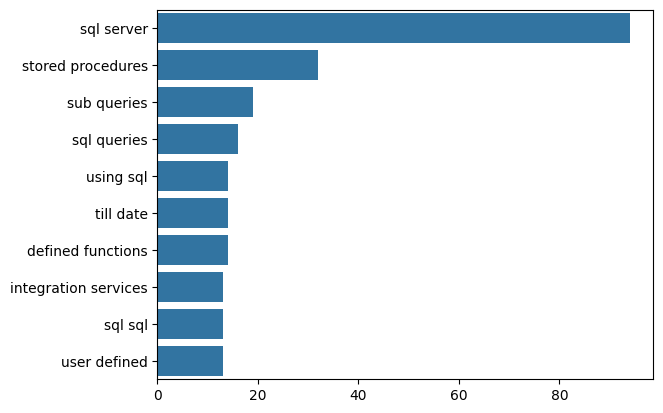

In [ ]:
plot_top_ngrams_barchart(resume_df[resume_df['Resume_Category']=='SQL']['Resume_Details'])

## Top 10 Trigram SQL resumes

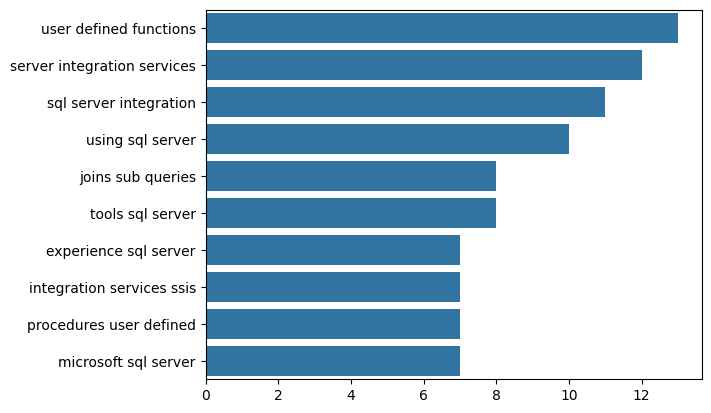

In [ ]:
plot_top_ngrams_barchart(resume_df[resume_df['Resume_Category']=='SQL']['Resume_Details'],3)

## Top 10 Bigram of workday resume

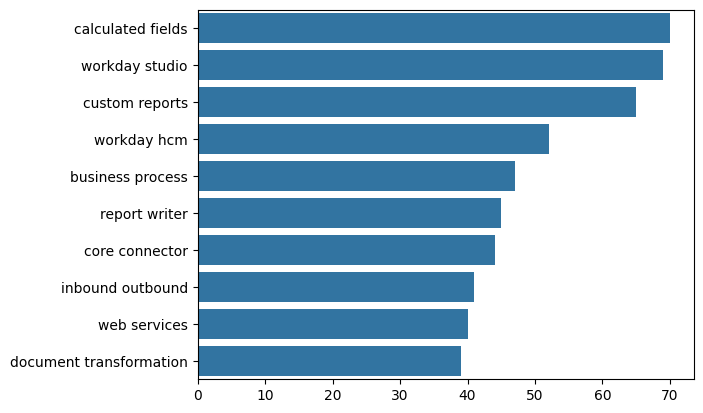

In [ ]:
plot_top_ngrams_barchart(resume_df[resume_df['Resume_Category']=='Workday']['Resume_Details'])

## Top 10 Trigram of workday resume

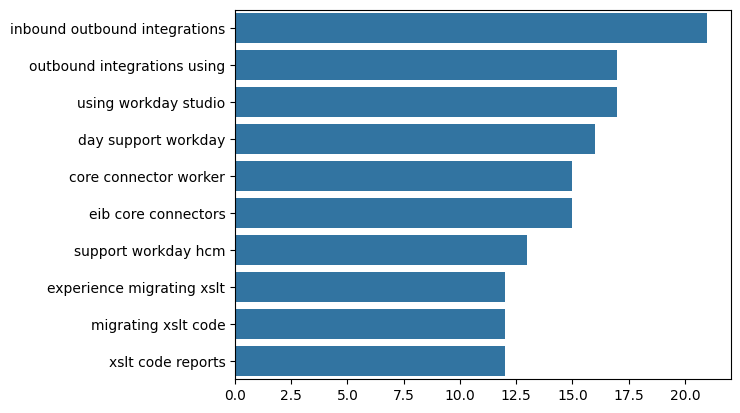

In [ ]:
plot_top_ngrams_barchart(resume_df[resume_df['Resume_Category']=='Workday']['Resume_Details'],3)

## Bigrams for Internship Resumes

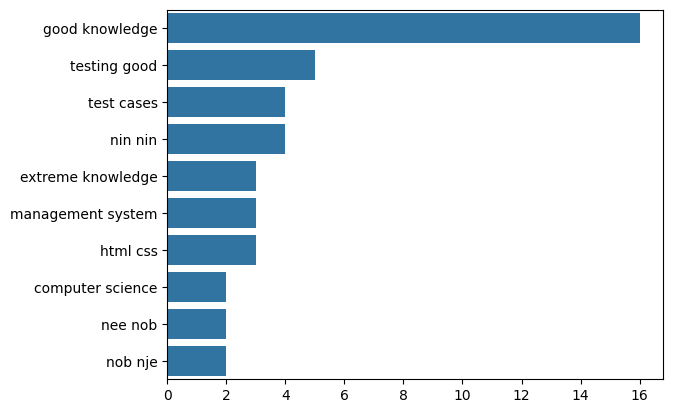

In [ ]:
plot_top_ngrams_barchart(resume_df[resume_df['Resume_Category']=='Intership']['Resume_Details'])

## Trigram for Internship resumes

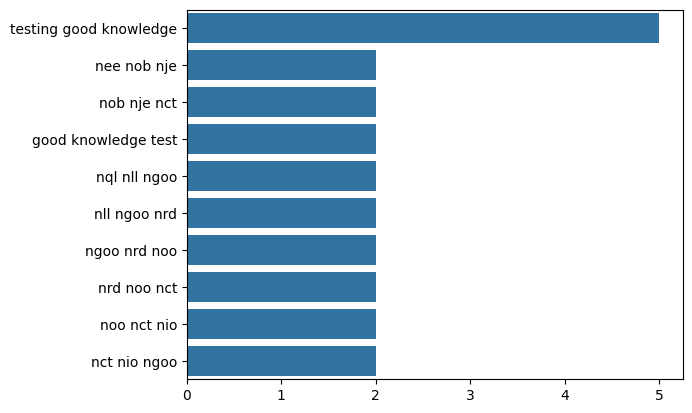

In [ ]:
plot_top_ngrams_barchart(resume_df[resume_df['Resume_Category']=='Intership']['Resume_Details'],3)

## Bar Chart

### Number of resumes in ever category

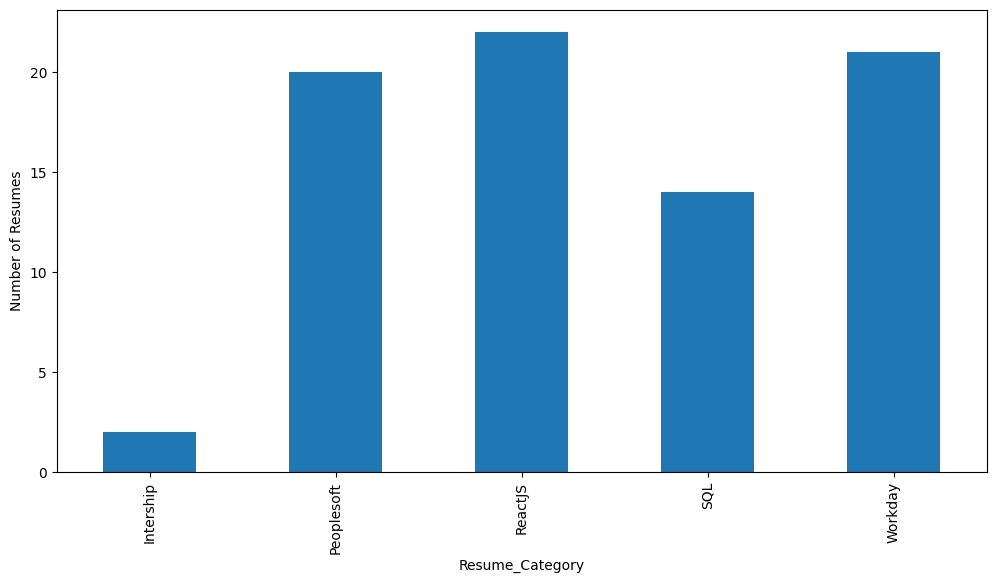

In [ ]:
resume_df['Resume_Category'].value_counts().sort_index().plot(kind = 'bar',figsize=(12,6))
plt.ylabel('Number of Resumes')
plt.show()

## Word Cloud

### Some comment

In [ ]:
def wordcloud(df, category):
    txt = " ".join(text for text in df[df['Resume_Category'] == category]['Resume_Details'])
    wordcloud = WordCloud(width=800, height=400, colormap='tab20c').generate(txt)
    return wordcloud

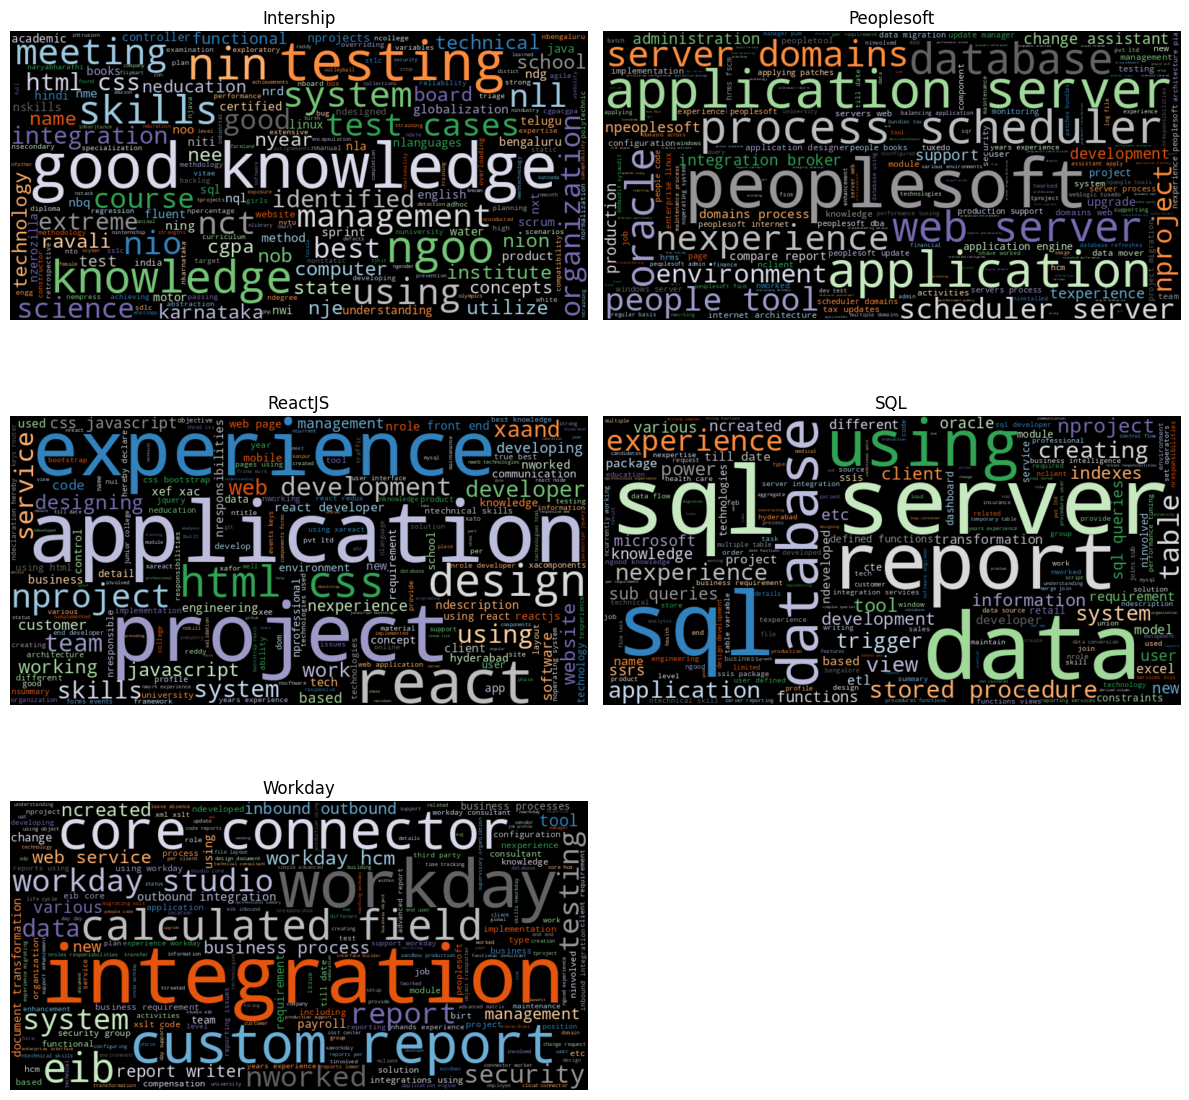

In [ ]:
plt.figure(figsize=(12, 12))
categories = resume_df['Resume_Category'].unique()

for i, category in enumerate(categories):
    plt.subplot(3, 2, i+1)
    plt.title(f'{category}')
    wc = wordcloud(resume_df, category)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')

plt.tight_layout()
plt.show()
plt.close()

## Conclusion :-
1. We have an idea of number of character, words and average length range of words in all resumes

2. The most occuring words along with their occuraaces  were plotted for each category

3. The Most occuring Bi-grams and Tri-grams in for each category of resumes was also visualized using world cloud and there ocuurance is also known by ploting the barh chart for each category seperatly this is of course be useful for appropriate classification of resume.